### Project Goals:

The project deals with the dataset of residential homes in Ames, Iowa containing 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa.
The Ames Housing dataset (http://www.amstat.org/publications/jse/v19n3/decock.pdf)was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

Following are the project goals which we will try to accomplish in this project:
- Predict final sales price of each home in the dataset with acceptable accuracy and precision
- Identify which key variables describing home have significant influence on the sale price
- Learn creative feature engineering
- Apply advanced regression techniques like random forest and gradient boosting

### A little more information about the dataset:
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Data Files: 
#### File descriptions
- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

### Data Fields
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale


## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
from sklearn.ensemble import BaggingRegressor
#import xgboost
from numpy import nan
from numpy import isnan
from sklearn.metrics import mean_squared_error

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats
from scipy.stats import t
import numpy as np
from numpy.random import seed
import sklearn.model_selection
#%matplotlib inline

In [3]:
#loading training data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


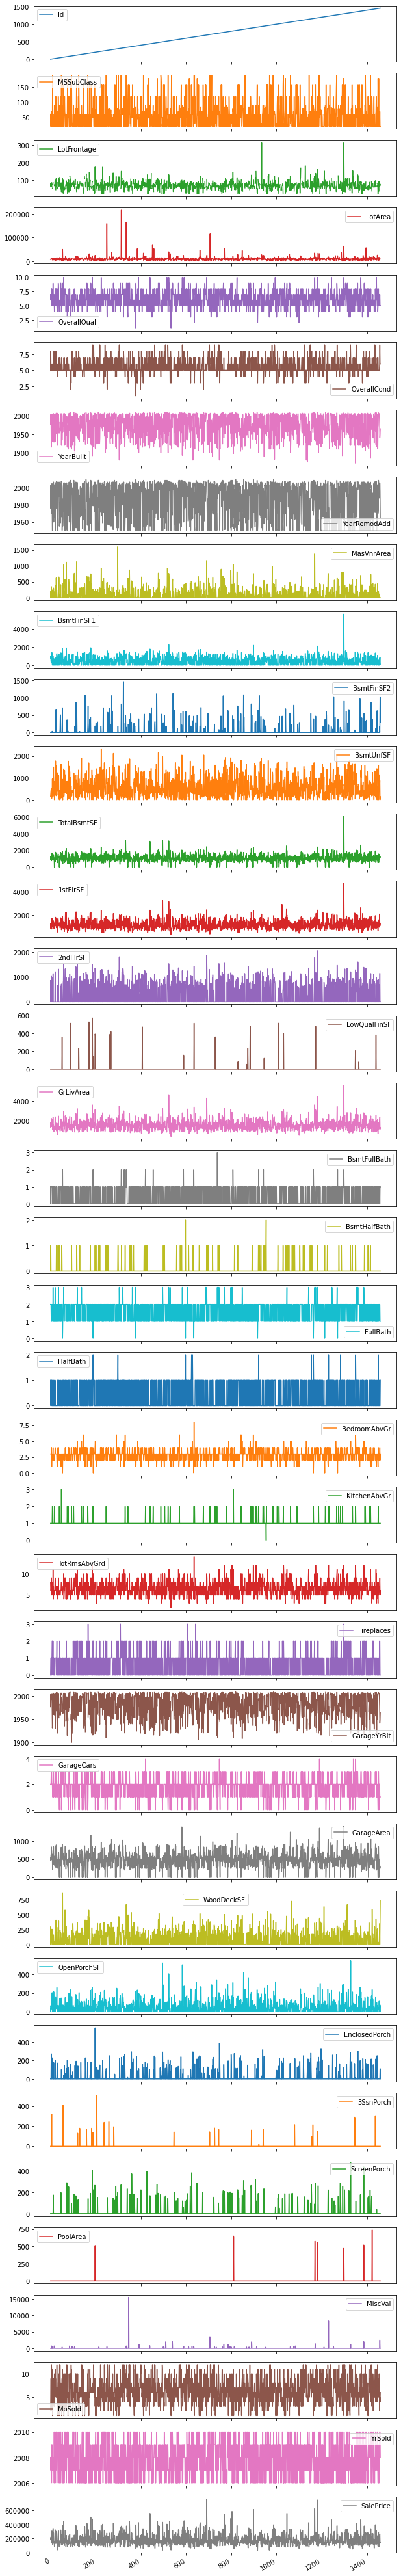

In [11]:
train.plot(subplots=True, figsize=(10,80))
plt.show()

- Majority of the attributes have records with values normally spread between the normal range spectrum with minimal or mostly no outliers in the distribution
- However there are a few attribites which have a few outliers These are as follows - LotFrontage, LotArea, BsmtFinSF1, TotalBsmSF, 1stFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, 3SsnPorch, PoolArea, MiscVal

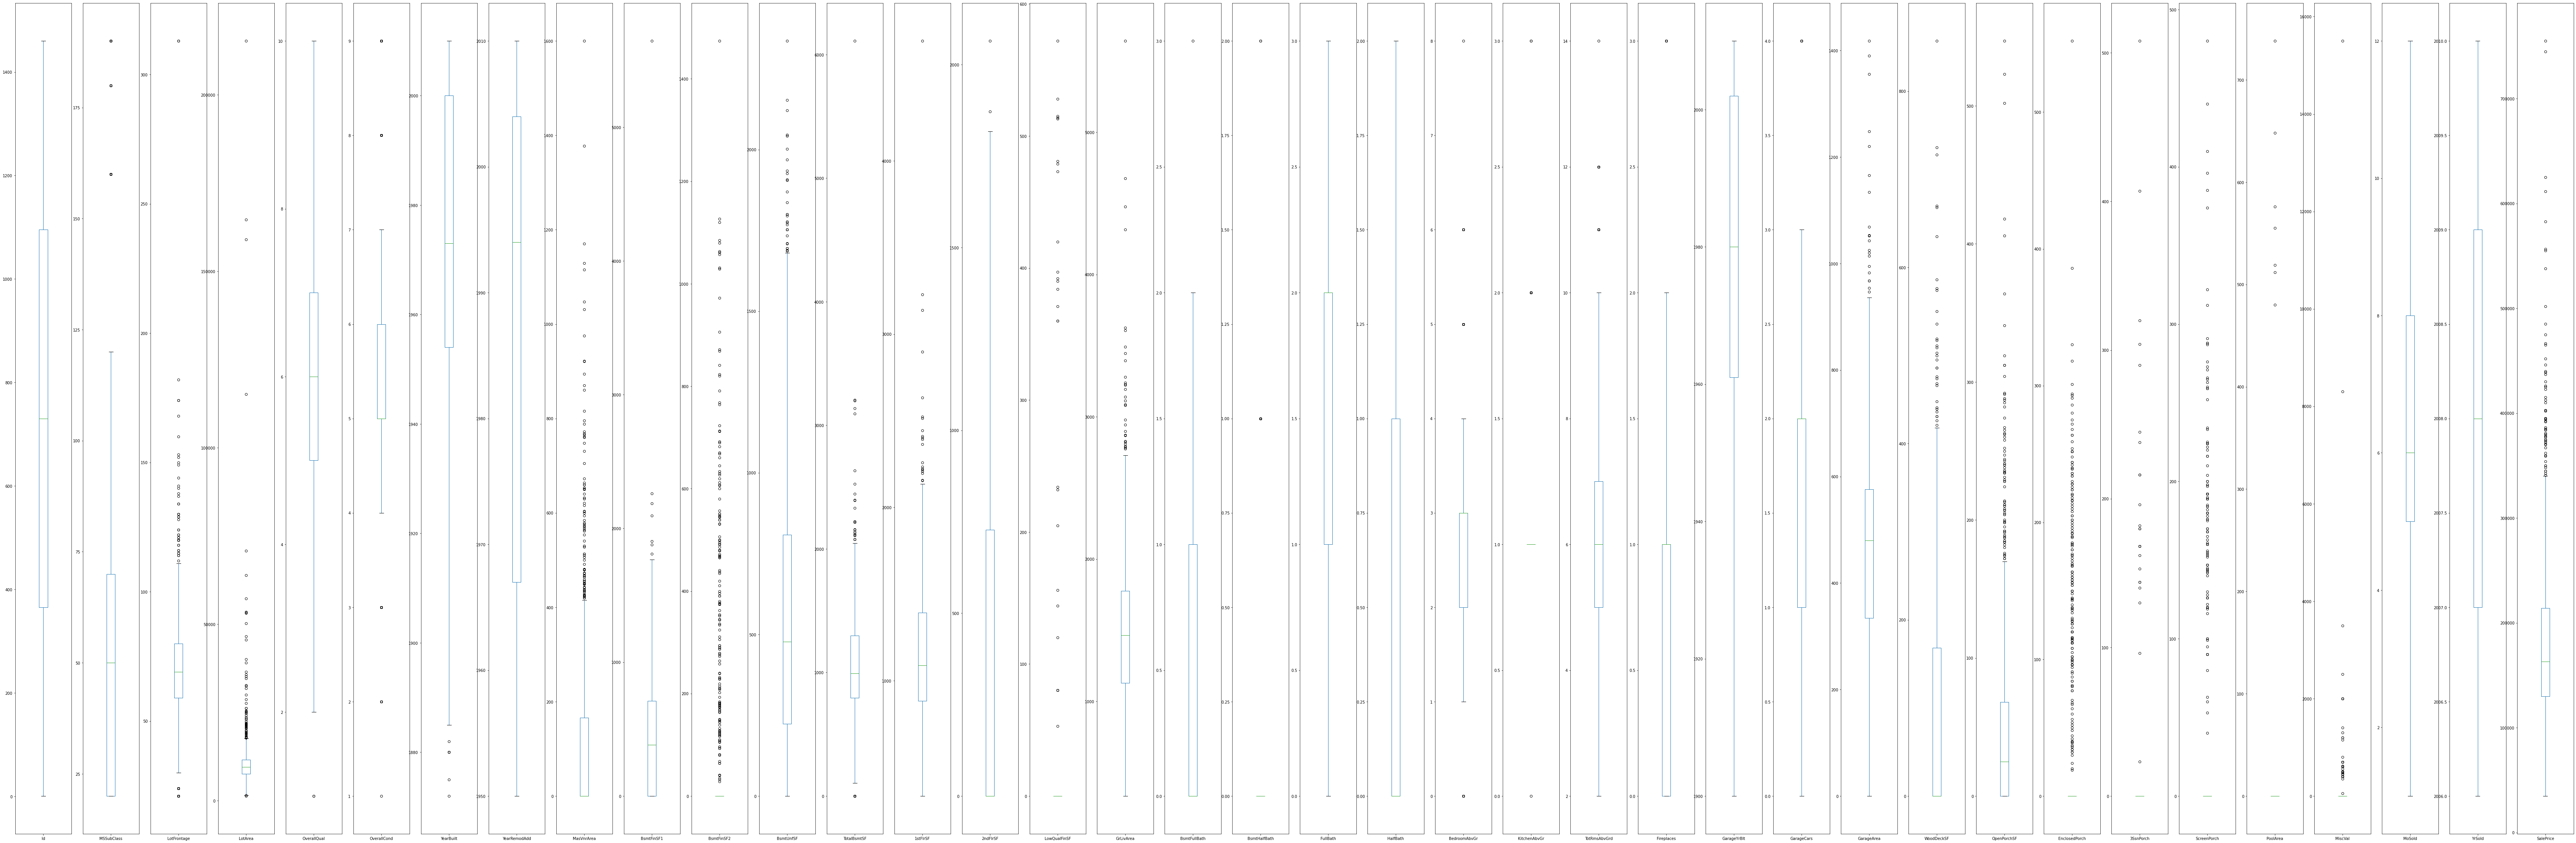

In [12]:
train.plot(kind='box', figsize=(120, 40), subplots=True)
plt.show()

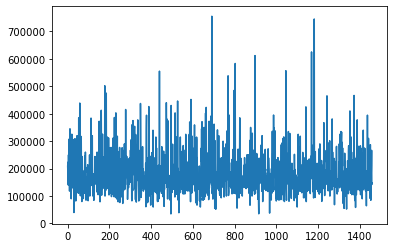

In [13]:
# plt.subplot(191)
train.SalePrice.plot()
plt.show()

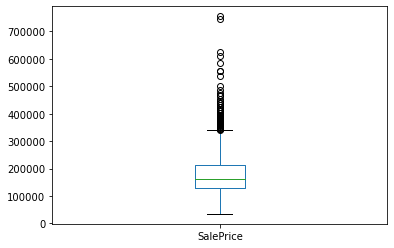

In [14]:
train.SalePrice.plot(kind='box')
plt.show()

- Majority of the houses are in the range of 100,000 to 200,000. There are a few outliers with prices beyond the 400K price range.

Visual inspection and analysis of the dataset indicates that following atribbutes could have a greater impact on determinig the sale price of the house over other attributes. However this is just the initial assessment and this may change as we dive deeper in the data using statsical and regression techniques.

- MSSubClass: Identifies the type of dwelling involved in the sale.
- MSZoning: Identifies the general zoning classification of the sale.
- LotArea: Lot size in square feet
- Utilities: Type of utilities available
- Neighborhood: Physical locations within Ames city limits
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house
- ExterQual: Evaluates the quality of the material on the exterior 
- ExterCond: Evaluates the present condition of the material on the exterior
- Foundation: Type of foundation
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- GrLivArea: Above grade (ground) living area square feet
- KitchenQual: Kitchen quality
- GarageType: Garage location
- PoolQC: Pool quality!

We will now to an exploratory data analysis for these attributes


Text(0.5, 0, 'Lot Area')

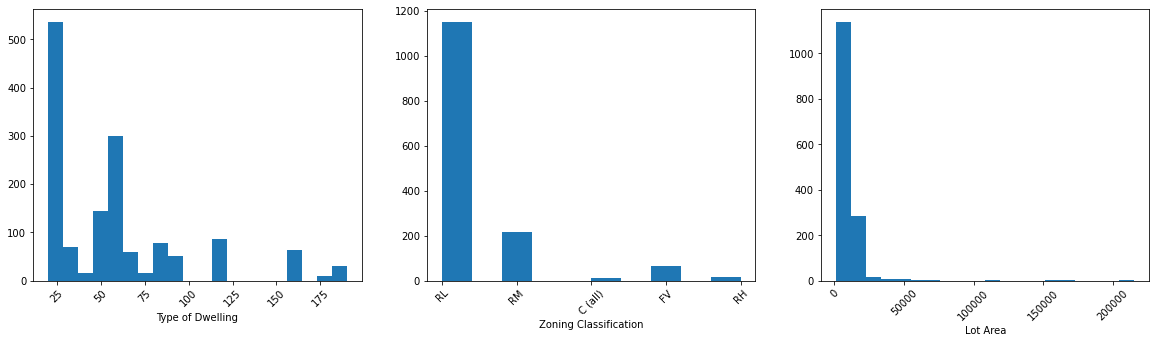

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.hist(train.MSSubClass, bins=20)
plt.xticks(rotation=45)
plt.xlabel('Type of Dwelling')

plt.subplot(132)
plt.hist(train.MSZoning)
plt.xticks(rotation=45)
plt.xlabel('Zoning Classification')

plt.subplot(133)
plt.hist(train.LotArea, bins=20)
plt.xticks(rotation=45)
plt.xlabel('Lot Area')

- Large number of dwellings are 1-story 1946 & Newer All Styles category (value = 20)
- Most of the houses fall sidential Low Density zone (value = RL)
- Most of the houses have lot area in the range of 0 to 10K and 10k to 20K

Text(0.5, 0, 'Building Type')

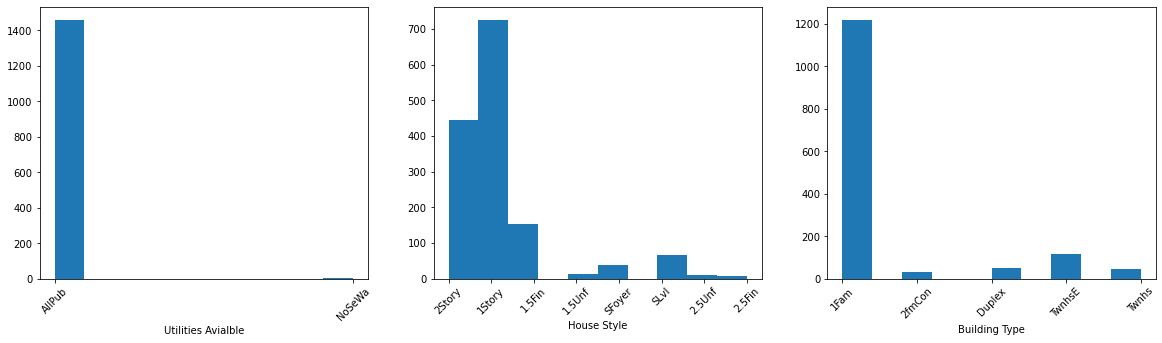

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.hist(train.Utilities)
plt.xticks(rotation=45)
plt.xlabel('Utilities Avialble')

plt.subplot(132)
plt.hist(train.HouseStyle)
plt.xticks(rotation=45)
plt.xlabel('House Style')

plt.subplot(133)
plt.hist(train.BldgType)
plt.xticks(rotation=45)
plt.xlabel('Building Type')

- All houses have all the utilities available
- Most of the houses are either 1 story or 2 story
- Most of the houses are of single familiy type

Text(0.5, 0, 'Neighborhood')

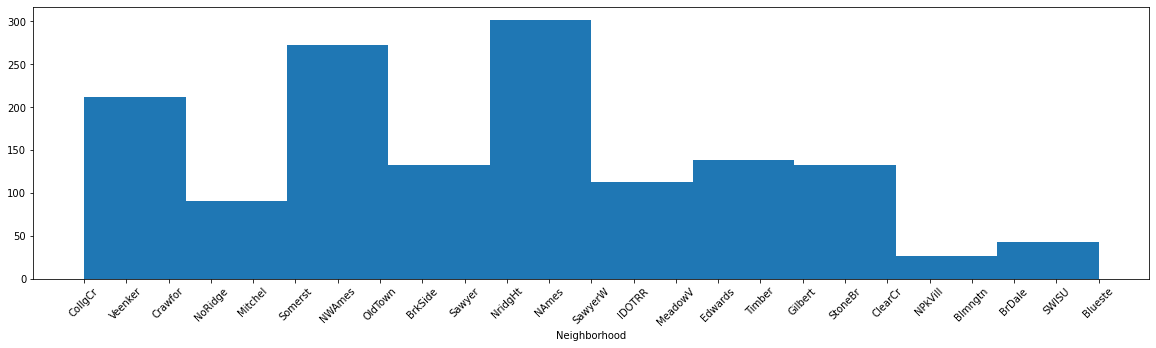

In [17]:
plt.figure(figsize=(20,5))
plt.hist(train['Neighborhood'])
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')

- Top neighborhoods where large number of houses are located are Northridge Heights, North Ames, Somerset, Northwest Ames, College Creek and Veenker

Text(0.5, 0, 'External Quality - Poor to Excellent')

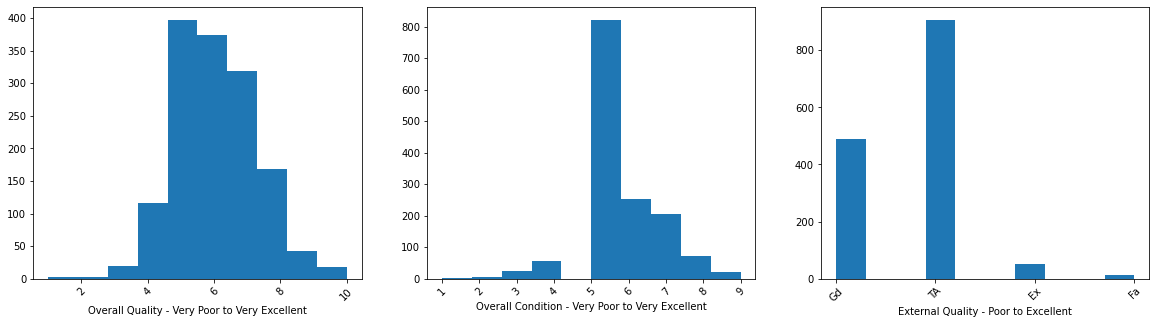

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.hist(train.OverallQual, bins=10)
plt.xticks(rotation=45)
plt.xlabel('Overall Quality - Very Poor to Very Excellent')

plt.subplot(132)
plt.hist(train.OverallCond)
plt.xticks(rotation=45)
plt.xlabel('Overall Condition - Very Poor to Very Excellent')

plt.subplot(133)
plt.hist(train.ExterQual)
plt.xticks(rotation=45)
plt.xlabel('External Quality - Poor to Excellent')

- Most of the houses fall in Average (5) to Very Good range for Overall Quality (8)
- Similalry, Overall Condition for most of the houses range from Average (5) to Very Good (8)
- External Quality ranges from Average to Good

Text(0.5, 0, 'Kitchen Quality - Poor to Excellent')

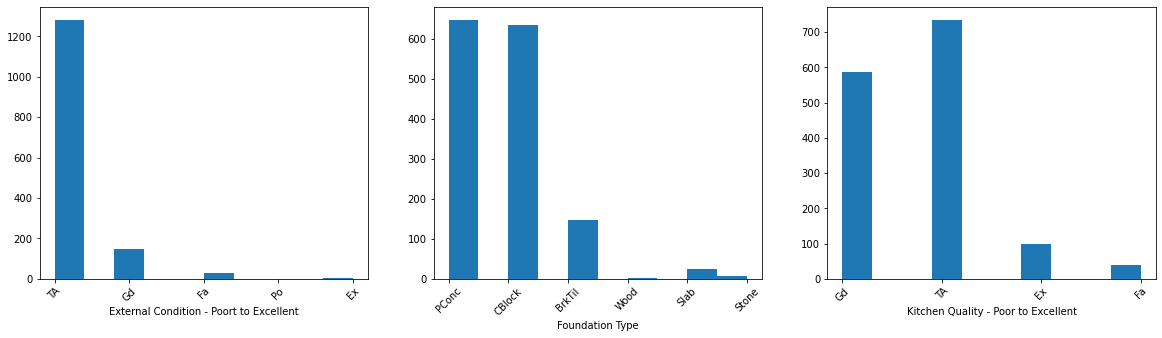

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.hist(train.ExterCond)
plt.xticks(rotation=45)
plt.xlabel('External Condition - Poort to Excellent')

plt.subplot(132)
plt.hist(train.Foundation)
plt.xticks(rotation=45)
plt.xlabel('Foundation Type')

plt.subplot(133)
plt.hist(train.KitchenQual)
plt.xticks(rotation=45)
plt.xlabel('Kitchen Quality - Poor to Excellent')

- Most of the houses are of Average External Condition
- Foundation type is primarily Poured Concrete or Ciner Block type
- Kitchn Quality ranges from Average to Good for most of the houses

Text(0.5, 0, 'Second Floor Area')

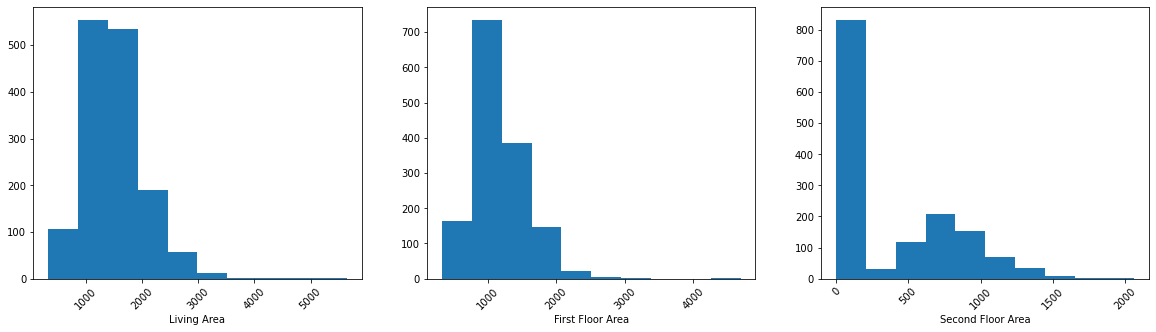

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.hist(train.GrLivArea)
plt.xticks(rotation=45)
plt.xlabel('Living Area')

plt.subplot(132)
plt.hist(train['1stFlrSF'])
plt.xticks(rotation=45)
plt.xlabel('First Floor Area')

plt.subplot(133)
plt.hist(train['2ndFlrSF'])
plt.xticks(rotation=45)
plt.xlabel('Second Floor Area')

- Most of the houses range from 1000 SqFt to 2000 SqFt of Living Area
- First Floor area range from 300 to 2000 SqFt
- Large number of houses with second floor area have second floor with area in the range of 200 SqFt, with rest of the houses second floor area ranging between 500 to 1500 SqFt

Text(0.5, 0, 'Condition of Sale')

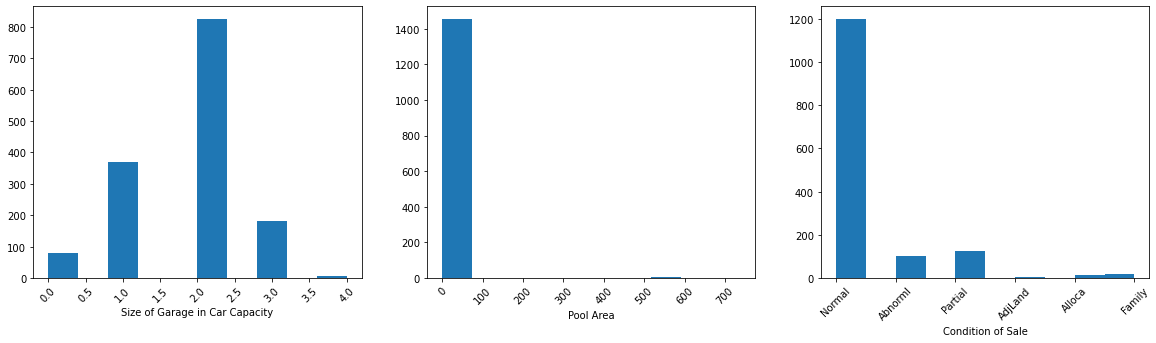

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.hist(train.GarageCars)
plt.xticks(rotation=45)
plt.xlabel('Size of Garage in Car Capacity')

plt.subplot(132)
plt.hist(train['PoolArea'])
plt.xticks(rotation=45)
plt.xlabel('Pool Area')

plt.subplot(133)
plt.hist(train['SaleCondition'])
plt.xticks(rotation=45)
plt.xlabel('Condition of Sale')

- Most of the houses have garages which can accomodate 2 cars, and rest of the houses of garages which can accommodate just 1 or in some cases 3 cars
- Pool area ranges from 0 to 100 SqFt for most of the houses
- Most of the houses were sold as Normal Condition

### Pre-Processing before applying ML Modeles

We need to drop columns which have large number of null values (which were later replaced by placeholder values). From the earlier analysis we know that following attributes large number (more than 50%) null values. Let's drop these columns to ensure the data in these columns do not affect regression model.

Attribites with large Null values
'PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'

In [22]:
train3 = train.drop(columns = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'])
train3.shape

(1460, 75)

In [23]:
# We have to repeat this change for Test data as well
test3 = test.drop(columns = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'])
test3.shape

(1459, 74)

### Additional Exploratory Data Analysis

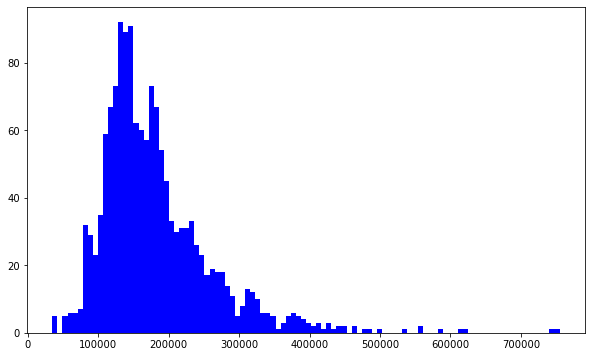

In [24]:
train3['SalePrice'].hist(bins = 100, grid = False, color = 'blue', figsize = (10,6))
plt.show()

In [25]:
train3.agg({'SalePrice':['mean', 'median','skew','kurtosis', 'std','min','max']})

,SalePrice
mean,180921.195890
median,163000.000000
skew,1.882876
kurtosis,6.536282
std,79442.502883
min,34900.000000
max,755000.000000


Now let's try to normalize data using other methods.

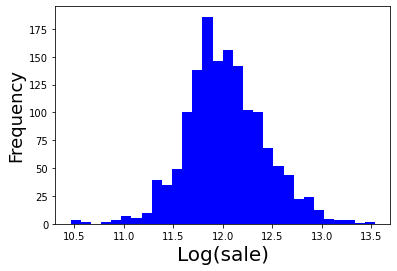

In [26]:
np.log(train3['SalePrice']).plot.hist(bins=30, color = 'blue')
plt.xlabel('Log(sale)', fontsize=20)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize =10)
plt.yticks(fontsize = 10)
plt.show()

In [27]:
#Explore Numerical Features
train_numerical = train3.select_dtypes(include = [np.number])
train_numerical

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


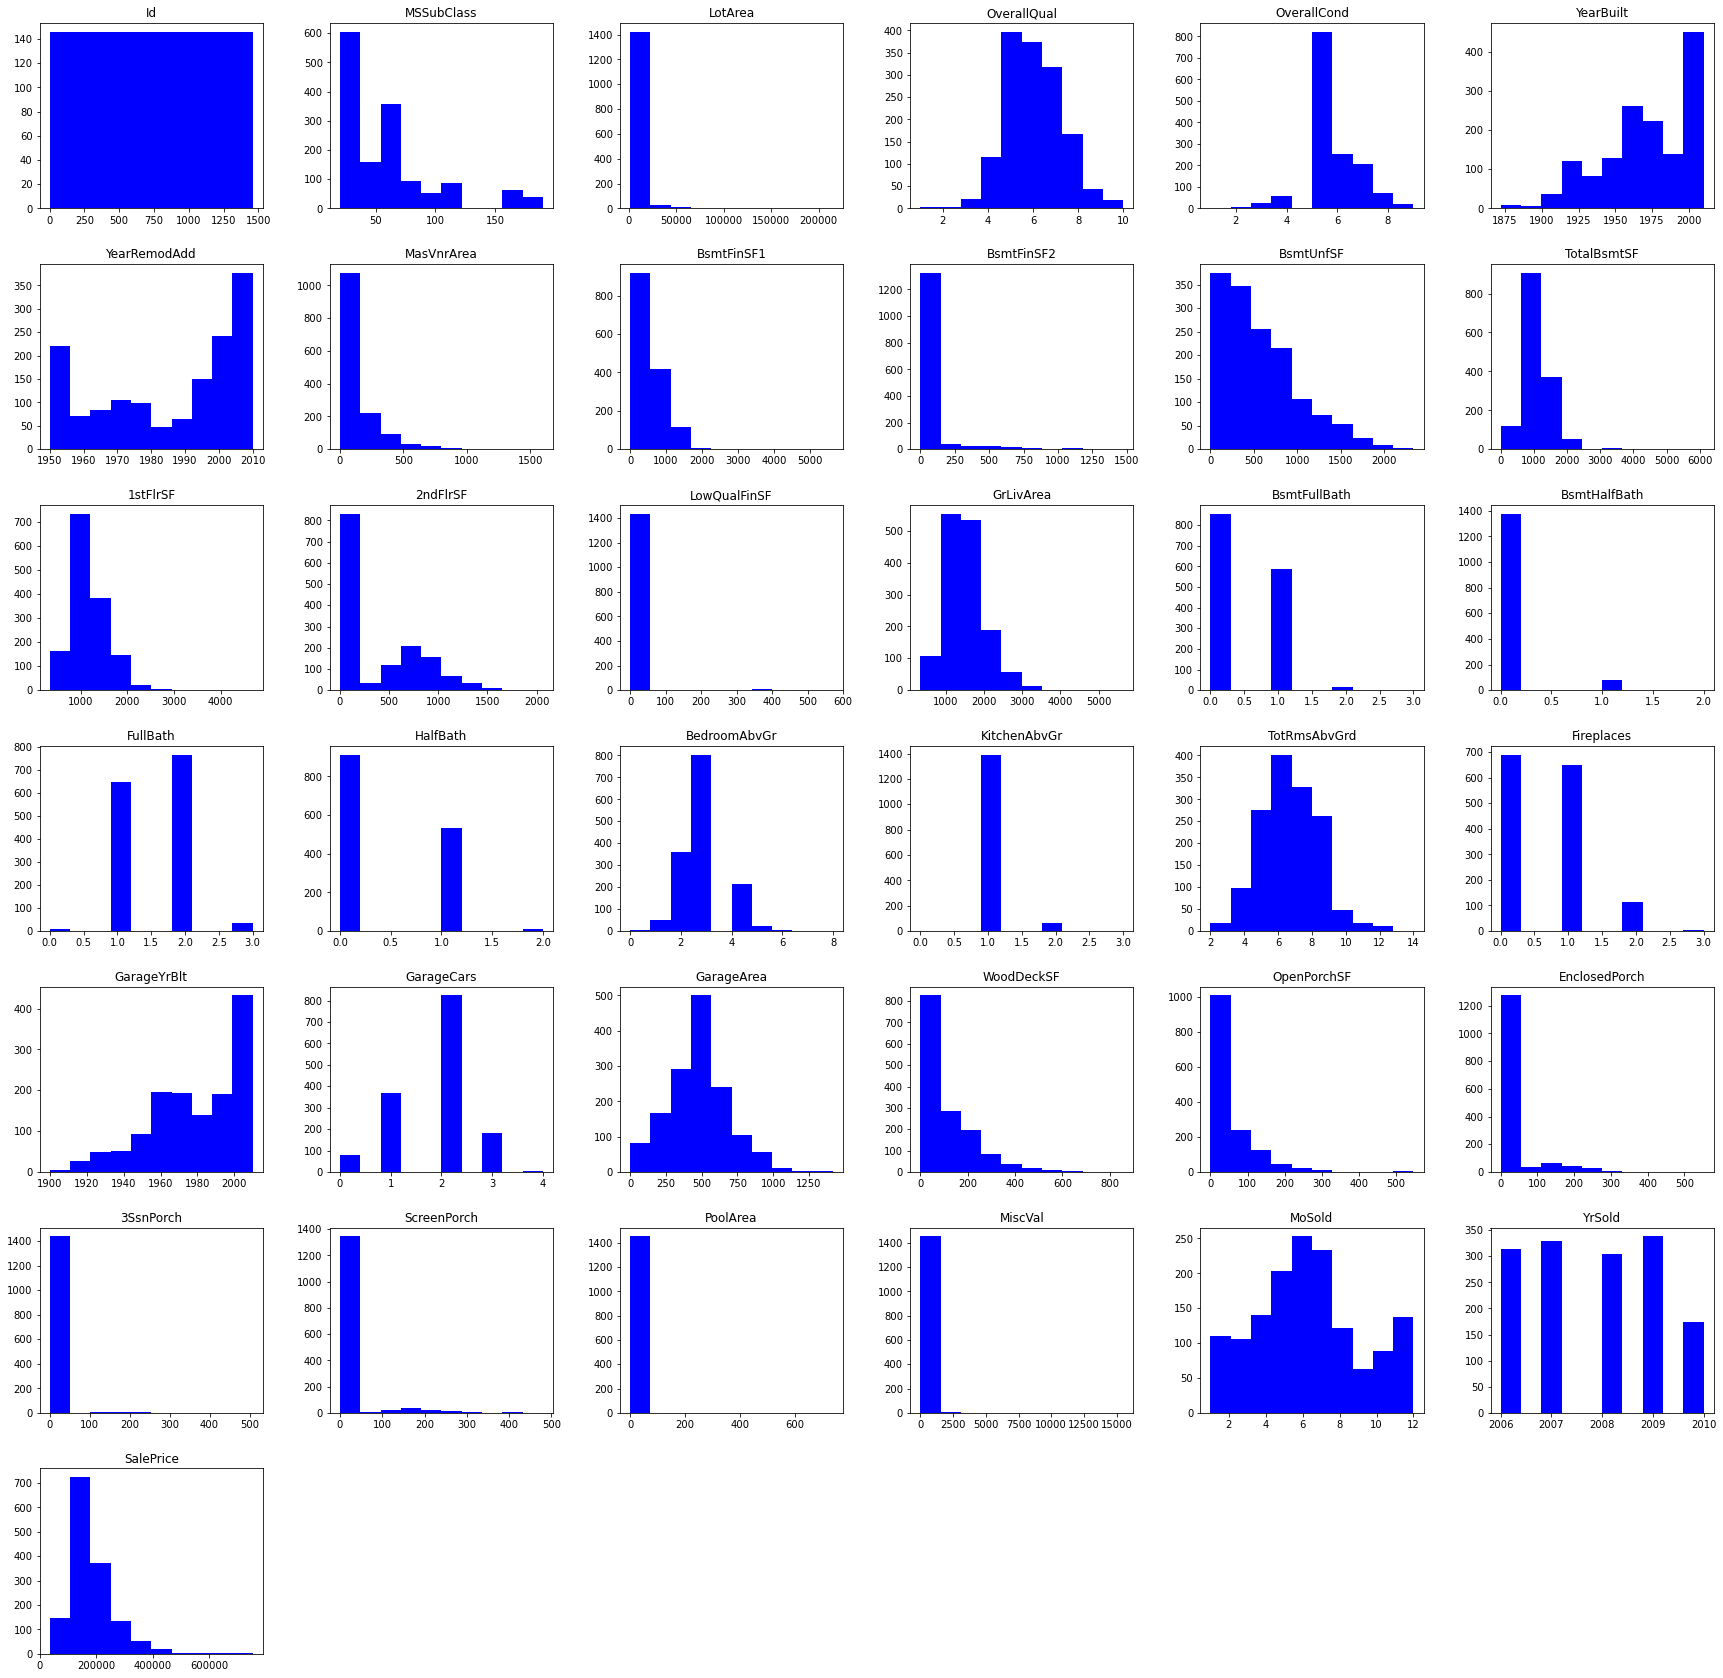

In [28]:
train_numerical.hist(figsize = (30,30), grid = False, color ='blue')
plt.show()

In the above histogram, there are many variables such as PoolArea,ScreenPorch, EnclosedPorch, MiscVal, 3SsnPorch, LowQualFinSF, BsmtFinSF2,and KitchenAbvGr having too many rows being too many same values and reflect extreme outliers. Outliers can affect a regression model by pulling our estimated regression line further away from the true population regression line.

In [29]:
# Let's drop these features from the dataset
train_numerical = train_numerical.drop(columns = ['PoolArea','ScreenPorch',
                 'EnclosedPorch','MiscVal','3SsnPorch','LowQualFinSF',
                'BsmtFinSF2', 'KitchenAbvGr','BsmtHalfBath','LowQualFinSF'])
train_numerical

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,150,...,8,0,2003.0,2,548,0,61,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,284,...,6,1,1976.0,2,460,298,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,434,...,6,1,2001.0,2,608,0,42,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,540,...,7,1,1998.0,3,642,0,35,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,490,...,9,1,2000.0,3,836,192,84,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,953,...,7,1,1999.0,2,460,0,40,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,589,...,7,2,1978.0,2,500,349,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,877,...,9,2,1941.0,1,252,0,60,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,0,...,5,0,1950.0,1,240,366,0,4,2010,142125


In [30]:
# We have to also repeat this process for test dataset
test_numerical = test3.select_dtypes(include = [np.number])
test_numerical = test_numerical.drop(columns = ['PoolArea','ScreenPorch',
                 'EnclosedPorch','MiscVal','3SsnPorch','LowQualFinSF',
                'BsmtFinSF2', 'KitchenAbvGr','BsmtHalfBath','LowQualFinSF'])
test_numerical

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,270.0,...,2,5,0,1961.0,1.0,730.0,140,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,406.0,...,3,6,0,1958.0,1.0,312.0,393,36,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,137.0,...,3,6,1,1997.0,2.0,482.0,212,34,3,2010
3,1464,60,9978,6,6,1998,1998,20.0,602.0,324.0,...,3,7,1,1998.0,2.0,470.0,360,36,6,2010
4,1465,120,5005,8,5,1992,1992,0.0,263.0,1017.0,...,2,5,0,1992.0,2.0,506.0,0,82,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,546.0,...,3,5,0,NaN,0.0,0.0,0,0,6,2006
1455,2916,160,1894,4,5,1970,1970,0.0,252.0,294.0,...,3,6,0,1970.0,1.0,286.0,0,24,4,2006
1456,2917,20,20000,5,7,1960,1996,0.0,1224.0,0.0,...,4,7,1,1960.0,2.0,576.0,474,0,9,2006
1457,2918,85,10441,5,5,1992,1992,0.0,337.0,575.0,...,3,6,0,NaN,0.0,0.0,80,32,7,2006


### Assessment of Corelation between numerical features and target (Sale Price)
Let's assess corelation between features and target using pearson corelation coefficieint.

In [31]:
correlation = train_numerical.corr()['SalePrice'].sort_values().dropna()
correlation

MSSubClass     -0.084284
OverallCond    -0.077856
YrSold         -0.028923
Id             -0.021917
MoSold          0.046432
BedroomAbvGr    0.168213
BsmtUnfSF       0.214479
BsmtFullBath    0.227122
LotArea         0.263843
HalfBath        0.284108
OpenPorchSF     0.315856
2ndFlrSF        0.319334
WoodDeckSF      0.324413
BsmtFinSF1      0.386420
Fireplaces      0.466929
MasVnrArea      0.477493
GarageYrBlt     0.486362
YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

#### The features having a corelation coefficient of equal to or more than 0.5, can be safely assumed to be highly corelated with the Sale Price

### Now let's visually verify the coorelation pattern among various features using scatter plots.

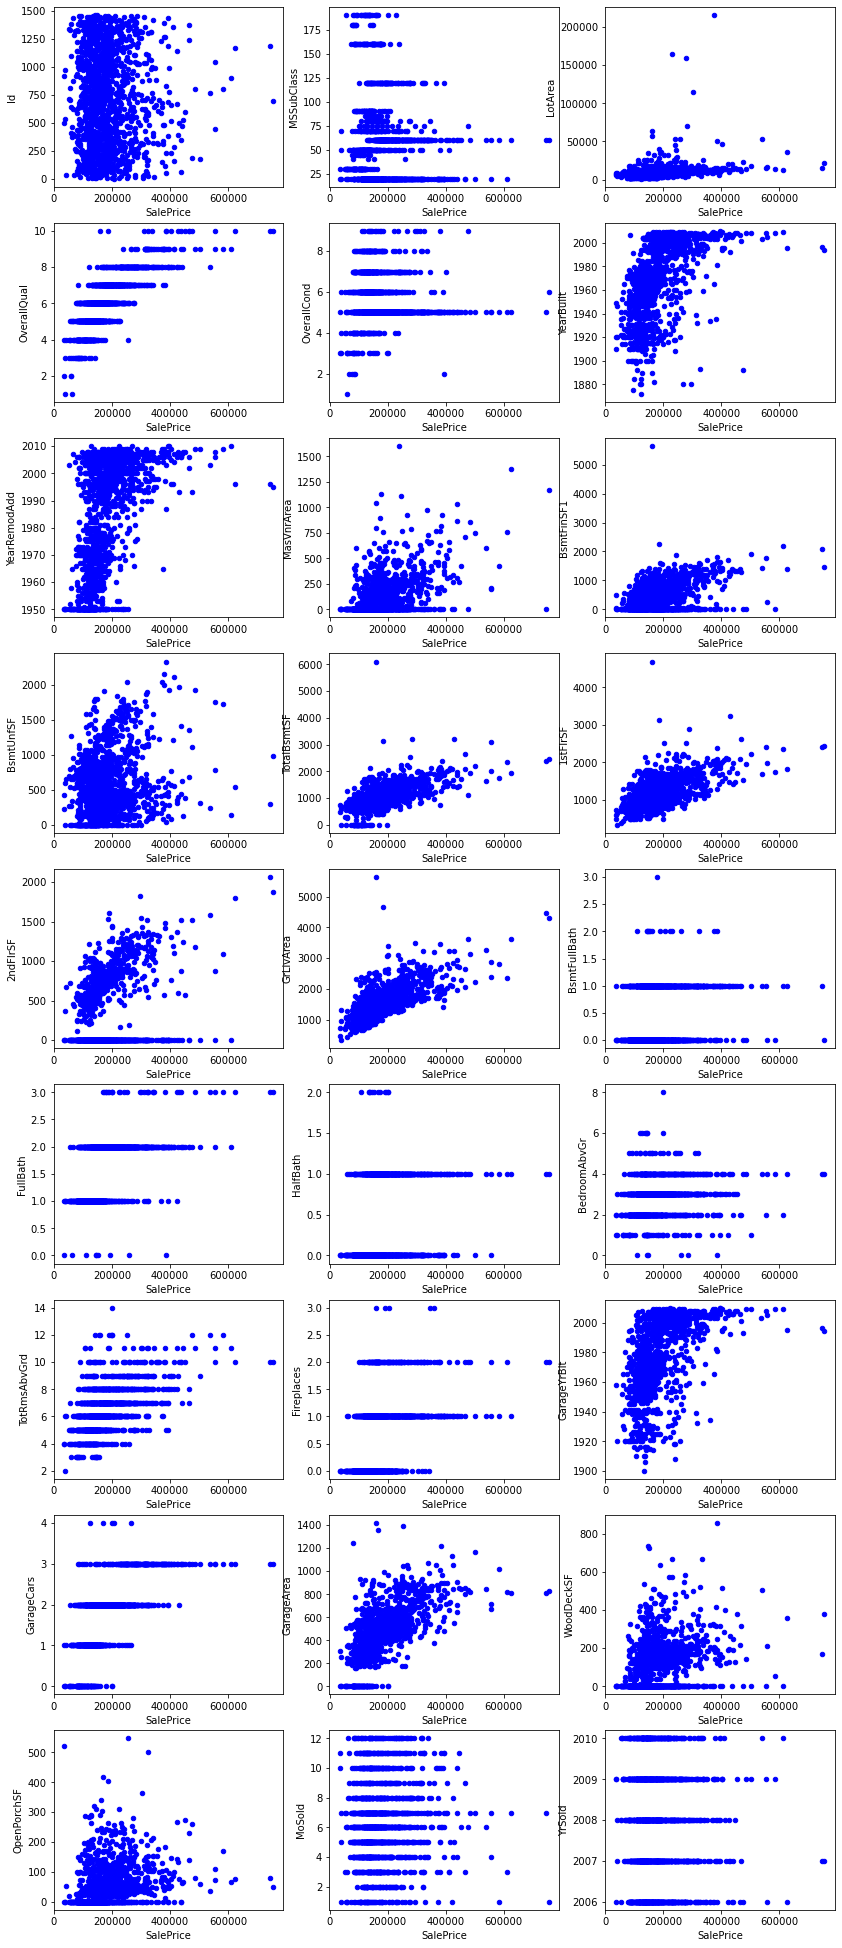

In [72]:
fig, axes = plt.subplots(9, 3, figsize=(14, 35))
axe = axes.ravel()
for i, col in enumerate(train_numerical.columns.values[:-1]):
    train_numerical.plot(x=('SalePrice'),y=(col),ax=axe[i], kind = 'scatter', color='blue')
plt.show()

Following features seem to have a linear relationship with the Sale Price, while the rest of the features do not exhibit a linear relationship with Sale Price and hence do not seem to have much influence on the sale price.
Lot Area: Lot size in square feet
1. Year Built: Original construction date
2. YearRemoAdd: Remodel date  
3. MasVnrArea: Masonry veneer area in square feet
4. BsmtFinSF1: Type 1 finished square feet
5. BsmtUnfSF: Unfinished square feet of basement area
6. TotalBsmtSF: Total square feet of basement area
7. 1stFlrSF: First Floor square feet
8. 2ndFlrSF: Second floor square feet
9. GrLivArea: Above grade (ground) living area square feet
10. GarageArea: Size of garage in square feet
11. WoodDeckSF: Wood deck area in square feet
12. OpenPorchSF: Open porch area in square feet

### Isolate Categorical Features
Now let's isolate features which are not numerical and instead contains only categorical values. We may need to test whether these features have a very skewed distribution of values, and hence may adversly impact the performance of the regression or any similar ML models.

In [33]:
train_categorical = train3.select_dtypes(exclude = [np.number])
train_categorical

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


We will try to identify features which have too many rows having too many similar values. We may need to eventually remove these features if most of the rows have just one or 2 values attributes associated with them. Essesntially it is assumed that these attributes do not have much role in influencing the sale price of the house.


In [34]:
num_rows = len(train_categorical.index)
low_information_cols = []

for col in train_categorical.columns:
    cnts = train_categorical[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.85:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Street: 99.58904%
Pave    1454
Grvl       6
Name: Street, dtype: int64

LandContour: 89.79452%
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities: 99.93151%
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LandSlope: 94.65753%
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Condition1: 86.30137%
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Condition2: 98.97260%
Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

RoofMatl: 98.21918%
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
ClyTile       1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64

ExterCond: 87.80822%
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

BsmtCo

From the numbers above we can see that the following attributes have most of the records with one or 2 values. In order to prevent the negative impact of these attributes on further ML analysis, we will remove these from the data tables. Essentially it is deemed here that these features do not play a big role in determining the sale price (relative sale price)

'Street','LandContour','Utilities','LandSlope','Condition1','Condition2','RoofMatl',  'ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir', 'Electrical','Functional', 'GarageQual','GarageCond','PavedDrive', 'SaleType'

In [35]:
train_categorical = train_categorical.drop(columns = ['Street','LandContour',
            'Utilities','LandSlope','Condition1','Condition2','RoofMatl',
            'ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir',
            'Electrical','Functional', 'GarageQual','GarageCond','PavedDrive',
            'SaleType'])
train_categorical

,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleCondition
0,RL,Reg,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn,Normal
1,RL,Reg,FR2,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn,Normal
2,RL,IR1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn,Normal
3,RL,IR1,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf,Abnorml
4,RL,IR1,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Inside,Gilbert,1Fam,2Story,Gable,VinylSd,VinylSd,None,TA,PConc,Gd,No,Unf,Ex,TA,Attchd,RFn,Normal
1456,RL,Reg,Inside,NWAmes,1Fam,1Story,Gable,Plywood,Plywood,Stone,TA,CBlock,Gd,No,ALQ,TA,TA,Attchd,Unf,Normal
1457,RL,Reg,Inside,Crawfor,1Fam,2Story,Gable,CemntBd,CmentBd,None,Ex,Stone,TA,No,GLQ,Ex,Gd,Attchd,RFn,Normal
1458,RL,Reg,Inside,NAmes,1Fam,1Story,Hip,MetalSd,MetalSd,None,TA,CBlock,TA,Mn,GLQ,Gd,Gd,Attchd,Unf,Normal


In [36]:
#Let's repeat this extercise for Test dataset
test_categorical = test3.select_dtypes(exclude = [np.number])
test_categorical

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal


In [37]:
test_categorical = test_categorical.drop(columns = ['Street','LandContour',
            'Utilities','LandSlope','Condition1','Condition2','RoofMatl',
            'ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir',
            'Electrical','Functional', 'GarageQual','GarageCond','PavedDrive',
            'SaleType'])
test_categorical

,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleCondition
0,RH,Reg,Inside,NAmes,1Fam,1Story,Gable,VinylSd,VinylSd,None,TA,CBlock,TA,No,Rec,TA,TA,Attchd,Unf,Normal
1,RL,IR1,Corner,NAmes,1Fam,1Story,Hip,Wd Sdng,Wd Sdng,BrkFace,TA,CBlock,TA,No,ALQ,TA,Gd,Attchd,Unf,Normal
2,RL,IR1,Inside,Gilbert,1Fam,2Story,Gable,VinylSd,VinylSd,None,TA,PConc,Gd,No,GLQ,Gd,TA,Attchd,Fin,Normal
3,RL,IR1,Inside,Gilbert,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,TA,PConc,TA,No,GLQ,Ex,Gd,Attchd,Fin,Normal
4,RL,IR1,Inside,StoneBr,TwnhsE,1Story,Gable,HdBoard,HdBoard,None,Gd,PConc,Gd,No,ALQ,Ex,Gd,Attchd,RFn,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Reg,Inside,MeadowV,Twnhs,2Story,Gable,CemntBd,CmentBd,None,TA,CBlock,TA,No,Unf,Gd,TA,NaN,NaN,Normal
1455,RM,Reg,Inside,MeadowV,TwnhsE,2Story,Gable,CemntBd,CmentBd,None,TA,CBlock,TA,No,Rec,TA,TA,CarPort,Unf,Abnorml
1456,RL,Reg,Inside,Mitchel,1Fam,1Story,Gable,VinylSd,VinylSd,None,TA,CBlock,TA,No,ALQ,Ex,TA,Detchd,Unf,Abnorml
1457,RL,Reg,Inside,Mitchel,1Fam,SFoyer,Gable,HdBoard,Wd Shng,None,TA,PConc,Gd,Av,GLQ,TA,TA,NaN,NaN,Normal


## In Depth Analysis and Prediction Using ML Techniques

In [38]:
#Let's first do log transformation of numeric variables
np.seterr(divide = 'ignore')
log_train_numerical = np.log(train_numerical)
log_train_numerical = log_train_numerical.replace(to_replace = float('-inf'), value = 0)
log_train_numerical

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,0.000000,4.094345,9.041922,1.945910,1.609438,7.602401,7.602401,5.278115,6.559615,5.010635,...,2.079442,0.000000,7.602401,0.693147,6.306275,0.000000,4.110874,0.693147,7.604894,12.247694
1,0.693147,2.995732,9.169518,1.791759,2.079442,7.588830,7.588830,0.000000,6.885510,5.648974,...,1.791759,0.000000,7.588830,0.693147,6.131226,5.697093,0.000000,1.609438,7.604396,12.109011
2,1.098612,4.094345,9.328123,1.945910,1.609438,7.601402,7.601902,5.087596,6.186209,6.073045,...,1.791759,0.000000,7.601402,0.693147,6.410175,0.000000,3.737670,2.197225,7.604894,12.317167
3,1.386294,4.248495,9.164296,1.945910,1.609438,7.557473,7.585789,0.000000,5.375278,6.291569,...,1.945910,0.000000,7.599902,1.098612,6.464588,0.000000,3.555348,0.693147,7.603898,11.849398
4,1.609438,4.094345,9.565214,2.079442,1.609438,7.600902,7.600902,5.857933,6.484635,6.194405,...,2.197225,0.000000,7.600902,1.098612,6.728629,5.257495,4.430817,2.484907,7.604894,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7.283448,4.094345,8.976768,1.791759,1.609438,7.600402,7.600902,0.000000,0.000000,6.859615,...,1.945910,0.000000,7.600402,0.693147,6.131226,0.000000,3.688879,2.079442,7.604396,12.072541
1456,7.284135,2.995732,9.486076,1.791759,1.791759,7.589842,7.594884,4.779123,6.672033,6.378426,...,1.945910,0.693147,7.589842,0.693147,6.214608,5.855072,0.000000,0.693147,7.605890,12.254863
1457,7.284821,4.248495,9.109636,1.945910,2.197225,7.570959,7.603898,0.000000,5.616771,6.776507,...,2.197225,0.693147,7.570959,0.000000,5.529429,0.000000,4.094345,1.609438,7.605890,12.493130
1458,7.285507,2.995732,9.181632,1.609438,1.791759,7.575585,7.598900,0.000000,3.891820,0.000000,...,1.609438,0.000000,7.575585,0.000000,5.480639,5.902633,0.000000,1.386294,7.605890,11.864462


In [39]:
log_test_numerical = np.log(test_numerical)
log_test_numerical = log_test_numerical.replace(to_replace = float('-inf'), value = 0)
log_test_numerical

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,7.286876,2.995732,9.360655,1.609438,1.791759,7.581210,7.581210,0.000000,6.148468,5.598422,...,0.693147,1.609438,0.0,7.581210,0.000000,6.593045,4.941642,0.000000,1.791759,7.605890
1,7.287561,2.995732,9.565704,1.791759,1.791759,7.579679,7.579679,4.682131,6.827629,6.006353,...,1.098612,1.791759,0.0,7.579679,0.000000,5.743003,5.973810,3.583519,1.791759,7.605890
2,7.288244,4.094345,9.534595,1.609438,1.609438,7.599401,7.599902,0.000000,6.673298,4.919981,...,1.098612,1.791759,0.0,7.599401,0.693147,6.177944,5.356586,3.526361,1.098612,7.605890
3,7.288928,4.094345,9.208138,1.791759,1.791759,7.599902,7.599902,2.995732,6.400257,5.780744,...,1.098612,1.945910,0.0,7.599902,0.693147,6.152733,5.886104,3.583519,1.791759,7.605890
4,7.289611,4.787492,8.518193,2.079442,1.609438,7.596894,7.596894,0.000000,5.572154,6.924612,...,0.693147,1.609438,0.0,7.596894,0.693147,6.226537,0.000000,4.406719,0.000000,7.605890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,7.977625,5.075174,7.568379,1.386294,1.945910,7.585789,7.585789,0.000000,0.000000,6.302619,...,1.098612,1.609438,0.0,NaN,0.000000,0.000000,0.000000,0.000000,1.791759,7.603898
1455,7.977968,5.075174,7.546446,1.386294,1.609438,7.585789,7.585789,0.000000,5.529429,5.683580,...,1.098612,1.791759,0.0,7.585789,0.000000,5.655992,0.000000,3.178054,1.386294,7.603898
1456,7.978311,2.995732,9.903488,1.609438,1.945910,7.580700,7.598900,0.000000,7.109879,0.000000,...,1.386294,1.945910,0.0,7.580700,0.693147,6.356108,6.161207,0.000000,2.197225,7.603898
1457,7.978654,4.442651,9.253496,1.609438,1.609438,7.596894,7.596894,0.000000,5.820083,6.354370,...,1.098612,1.791759,0.0,NaN,0.000000,0.000000,4.382027,3.465736,1.945910,7.603898


In [40]:
#Check alignment between Train and Test datasets for values of features
train_categorical.describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
LotShape,1460,4,Reg,925
LotConfig,1460,5,Inside,1052
Neighborhood,1460,25,NAmes,225
BldgType,1460,5,1Fam,1220
HouseStyle,1460,8,1Story,726
RoofStyle,1460,6,Gable,1141
Exterior1st,1460,15,VinylSd,515
Exterior2nd,1460,16,VinylSd,504
MasVnrType,1452,4,None,864


In [41]:
test_categorical.describe().T

,count,unique,top,freq
MSZoning,1455,5,RL,1114
LotShape,1459,4,Reg,934
LotConfig,1459,5,Inside,1081
Neighborhood,1459,25,NAmes,218
BldgType,1459,5,1Fam,1205
HouseStyle,1459,7,1Story,745
RoofStyle,1459,6,Gable,1169
Exterior1st,1458,13,VinylSd,510
Exterior2nd,1458,15,VinylSd,510
MasVnrType,1443,4,None,878


In [42]:
train_categorical['HouseStyle'] = train_categorical['HouseStyle'].replace(['2.5Fin'],train_categorical['HouseStyle'].mode())
train_categorical['Exterior1st'] = train_categorical['Exterior1st'].replace(['Stone'],train_categorical['Exterior1st'].mode())
train_categorical['Exterior1st'] = train_categorical['Exterior1st'].replace(['ImStucc'],train_categorical['Exterior1st'].mode())
train_categorical['Exterior2nd'] = train_categorical['Exterior2nd'].replace(['Other'],train_categorical['Exterior1st'].mode())


In [43]:
train_categorical.describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
LotShape,1460,4,Reg,925
LotConfig,1460,5,Inside,1052
Neighborhood,1460,25,NAmes,225
BldgType,1460,5,1Fam,1220
HouseStyle,1460,7,1Story,734
RoofStyle,1460,6,Gable,1141
Exterior1st,1460,13,VinylSd,518
Exterior2nd,1460,15,VinylSd,505
MasVnrType,1452,4,None,864


## Let's apply One Hot Encoder to the dataset to normaliza the data

In [44]:
train_cat_2 = pd.get_dummies(train_categorical)
test_cat_2 = pd.get_dummies(test_categorical)

print(train_cat_2.shape)
print(test_cat_2.shape)

(1460, 137)
(1459, 137)


## Concatinating Train and Test Data

In [45]:
train_features = pd.concat([log_train_numerical,train_cat_2], axis = 1)
test_features = pd.concat([log_test_numerical,test_cat_2], axis = 1)

In [46]:
#Making train features to be as same sample size as test features
train_ftrs = train_features[:-1]
train_ftrs

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,4.094345,9.041922,1.945910,1.609438,7.602401,7.602401,5.278115,6.559615,5.010635,...,0,0,1,0,0,0,0,0,1,0
1,0.693147,2.995732,9.169518,1.791759,2.079442,7.588830,7.588830,0.000000,6.885510,5.648974,...,0,0,1,0,0,0,0,0,1,0
2,1.098612,4.094345,9.328123,1.945910,1.609438,7.601402,7.601902,5.087596,6.186209,6.073045,...,0,0,1,0,0,0,0,0,1,0
3,1.386294,4.248495,9.164296,1.945910,1.609438,7.557473,7.585789,0.000000,5.375278,6.291569,...,1,0,0,1,1,0,0,0,0,0
4,1.609438,4.094345,9.565214,2.079442,1.609438,7.600902,7.600902,5.857933,6.484635,6.194405,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,7.282761,2.995732,8.922658,1.945910,1.609438,7.602900,7.603399,0.000000,6.016157,6.698268,...,0,0,1,0,0,0,0,0,1,0
1455,7.283448,4.094345,8.976768,1.791759,1.609438,7.600402,7.600902,0.000000,0.000000,6.859615,...,0,0,1,0,0,0,0,0,1,0
1456,7.284135,2.995732,9.486076,1.791759,1.791759,7.589842,7.594884,4.779123,6.672033,6.378426,...,0,0,0,1,0,0,0,0,1,0
1457,7.284821,4.248495,9.109636,1.945910,2.197225,7.570959,7.603898,0.000000,5.616771,6.776507,...,0,0,1,0,0,0,0,0,1,0


In [47]:
test_ftrs = test_features
test_ftrs

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7.286876,2.995732,9.360655,1.609438,1.791759,7.581210,7.581210,0.000000,6.148468,5.598422,...,0,0,0,1,0,0,0,0,1,0
1,7.287561,2.995732,9.565704,1.791759,1.791759,7.579679,7.579679,4.682131,6.827629,6.006353,...,0,0,0,1,0,0,0,0,1,0
2,7.288244,4.094345,9.534595,1.609438,1.609438,7.599401,7.599902,0.000000,6.673298,4.919981,...,0,1,0,0,0,0,0,0,1,0
3,7.288928,4.094345,9.208138,1.791759,1.791759,7.599902,7.599902,2.995732,6.400257,5.780744,...,0,1,0,0,0,0,0,0,1,0
4,7.289611,4.787492,8.518193,2.079442,1.609438,7.596894,7.596894,0.000000,5.572154,6.924612,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,7.977625,5.075174,7.568379,1.386294,1.945910,7.585789,7.585789,0.000000,0.000000,6.302619,...,0,0,0,0,0,0,0,0,1,0
1455,7.977968,5.075174,7.546446,1.386294,1.609438,7.585789,7.585789,0.000000,5.529429,5.683580,...,0,0,0,1,1,0,0,0,0,0
1456,7.978311,2.995732,9.903488,1.609438,1.945910,7.580700,7.598900,0.000000,7.109879,0.000000,...,1,0,0,1,1,0,0,0,0,0
1457,7.978654,4.442651,9.253496,1.609438,1.609438,7.596894,7.596894,0.000000,5.820083,6.354370,...,0,0,0,0,0,0,0,0,1,0


In [48]:
Consolidated1 = pd.concat([train_ftrs, test_ftrs], axis=0)
Consolidated1

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,4.094345,9.041922,1.945910,1.609438,7.602401,7.602401,5.278115,6.559615,5.010635,...,0,0,1,0,0,0,0,0,1,0
1,0.693147,2.995732,9.169518,1.791759,2.079442,7.588830,7.588830,0.000000,6.885510,5.648974,...,0,0,1,0,0,0,0,0,1,0
2,1.098612,4.094345,9.328123,1.945910,1.609438,7.601402,7.601902,5.087596,6.186209,6.073045,...,0,0,1,0,0,0,0,0,1,0
3,1.386294,4.248495,9.164296,1.945910,1.609438,7.557473,7.585789,0.000000,5.375278,6.291569,...,1,0,0,1,1,0,0,0,0,0
4,1.609438,4.094345,9.565214,2.079442,1.609438,7.600902,7.600902,5.857933,6.484635,6.194405,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,7.977625,5.075174,7.568379,1.386294,1.945910,7.585789,7.585789,0.000000,0.000000,6.302619,...,0,0,0,0,0,0,0,0,1,0
1455,7.977968,5.075174,7.546446,1.386294,1.609438,7.585789,7.585789,0.000000,5.529429,5.683580,...,0,0,0,1,1,0,0,0,0,0
1456,7.978311,2.995732,9.903488,1.609438,1.945910,7.580700,7.598900,0.000000,7.109879,0.000000,...,1,0,0,1,1,0,0,0,0,0
1457,7.978654,4.442651,9.253496,1.609438,1.609438,7.596894,7.596894,0.000000,5.820083,6.354370,...,0,0,0,0,0,0,0,0,1,0


## Let's split consolidated data in to Training and Testing sets

In [49]:
train5 = Consolidated1.iloc[:1459, :]
test5 = Consolidated1.iloc[1459:, :]
print(train5.shape)
print(test5.shape)

(1459, 165)
(1459, 165)


In [50]:
# dropping sale price column from test set which has null values
test6 =test5.drop(['SalePrice'], axis = 1)
test6.shape

(1459, 164)

In [51]:
X_train = train5.drop(['SalePrice', 'Id'], axis = 1)
y_train = np.array(train5['SalePrice']).reshape((-1,1))
X_test = test6.drop(['Id'], axis = 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1459, 163)
(1459, 1)
(1459, 163)


## We need to use imputer to replace missing/NaN values

In [52]:
imputer = SimpleImputer(missing_values=nan, strategy='median')
X_train = imputer.fit_transform(X_train)
print('Missing: %d' % isnan(X_train).sum())

Missing: 0


In [53]:
y_train = imputer.fit_transform(y_train)
print('Missing: %d' % isnan(y_train).sum())

Missing: 0


In [54]:
X_test = imputer.fit_transform(X_test)
print('Missing: %d' % isnan(X_test).sum())

Missing: 0


In [55]:
# Make sure all values are finite
print(np.where(~np.isfinite(X_train)))
print(np.where(~np.isfinite(y_train)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


## Let's Evaluate a Few Models

We will compare five different machine learning models using the great Scikit-Learn library:

1. Support Vector Machine Regression
2. Random Forest Regression
3. Gradient Boosting Regression
4. K-Nearest Neighbors Regression
5. Boosting Regressor

In [56]:
def RMSE(y_train, y_pred):
    return mean_squared_error(y_train, y_pred,squared = False)

In [57]:
def fit_and_evaluate (model):
    model.fit(X_train, y_train.ravel())
    model_pred = model.predict(X_test)
    model_RMSE = RMSE(y_train, model_pred)
    
    return model_RMSE

In [58]:
# Support Vector Regressor
svr = SVR(C=1000, gamma = 0.1)
svr_RMSE = fit_and_evaluate(svr)
svr_RMSE

0.47132559184049727

In [59]:
# Gradient Boosting Regressor
gradient_boosted = GradientBoostingRegressor(learning_rate = 0.1,random_state=60)
gradient_boosted_RMSE = fit_and_evaluate(gradient_boosted)
gradient_boosted_RMSE

0.5504183214580101

In [60]:
# Bagging Regressor
bagging = BaggingRegressor()
bagging_RMSE = fit_and_evaluate(bagging)
bagging_RMSE

0.5418501200330114

In [61]:
# Random Forest Regressor
random_forest = RandomForestRegressor(random_state=60)
random_forest_RMSE = fit_and_evaluate(random_forest)
random_forest_RMSE

0.5404380271000233

In [62]:
# KNeighbors Regressor
knn = KNeighborsRegressor(n_neighbors=10)
knn_RMSE = fit_and_evaluate(knn)
knn_RMSE

0.5103854276512614

### Since SVR method has the lowest RMSE we will go ahead with SVR method for further analysis

In [63]:
SVM = SVR().fit(X_train, y_train.ravel())
score = SVM.score(X_train, y_train)
print('R_squared:', score)
print('RMSE:', svr_RMSE)

R_squared: 0.8873301230904915
RMSE: 0.47132559184049727


In [64]:
HousePrice_Prediction_with_log = SVM.predict(X_test)
HousePrice_Prediction_with_log

array([11.67331478, 12.02302764, 12.10646058, ..., 11.96611778,
       11.65541846, 12.27776084])

In [65]:
# Converting log values back to normal values
HousePrice_Prediction_without_log = np.exp(HousePrice_Prediction_with_log)
HousePrice_Prediction_without_log

array([117396.78215015, 166546.13492393, 181037.69987283, ...,
       157332.67375508, 115314.50045709, 214864.06293624])

In [66]:
#Create a Dataframe for the results
results = pd.DataFrame()
results['Id'] = test.Id
results['SalePrice'] = HousePrice_Prediction_without_log
results

,Id,SalePrice
0,1461,117396.782150
1,1462,166546.134924
2,1463,181037.699873
3,1464,200325.377181
4,1465,186982.473085
...,...,...
1454,2915,85261.463708
1455,2916,87854.190275
1456,2917,157332.673755
1457,2918,115314.500457


## Conclusion

Out of the various models used, the Support Vector Model Regression method turned out to be the most effective method for predicting price. Although, it is difficult to determine why it was giving better results than other methods. Also, it is possible that for other datasets, this may not hold and some other model could turn out to be more effective. That is why it is important to evaluate many models to determine which model works the best